# Task-2 : Prediction using Unsupervised Learning

## Predicting optimum number of clusters in 'Iris' dataset

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

### Loading the Iris dataset

#### The Iris dataset consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [14]:
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

Iris dataset is in the form of sklearn.utils.Bunch. 
We'll convert it to Pandas DataFrame for easy data manipulation

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
print("Total entries in the dataframe: ",len(df))

Total entries in the dataframe:  150


In [7]:
# Get basic information of the data ie missing vlaues, len etc...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
# Get the statistical info
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plotting the data as pair plots

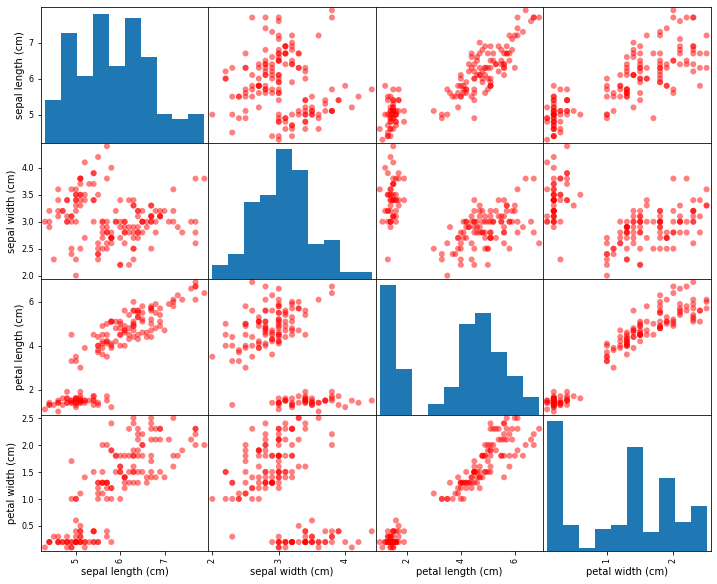

In [9]:
g = pd.plotting.scatter_matrix(df,marker='o',figsize=(12,10),color='red')

Selecting the features for clustering

In [10]:
X = df.iloc[:,:].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Finding the optimal of clusters using KMeans clustering

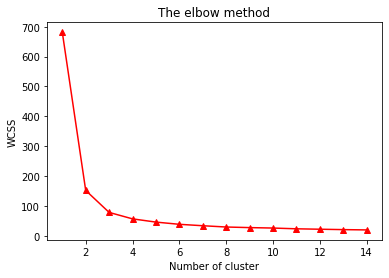

In [11]:
WCSS = []
n_cluster = range(1,15)
for i in n_cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
# Plotting the results on line graph
plt.plot(n_cluster, WCSS,c='red',marker='^')
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

From the above it's clear that number of clusters is "3"  as the at 3 the elbow curve occurs. It's the optimal point above which WCSS dosen't decrease.

## Creating the K-Means classifier

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
predictions = kmeans.fit_predict(X)

### Visualising the clusters

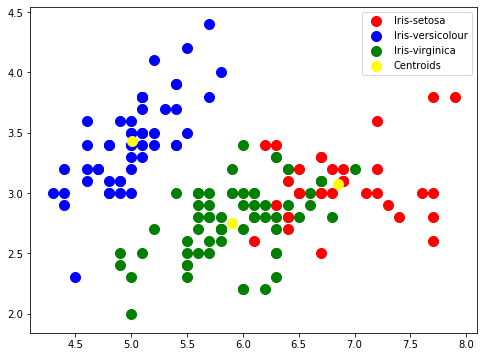

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[predictions == 0,0],X[predictions == 0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[predictions == 1,0],X[predictions == 1,1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[predictions == 2,0],X[predictions == 2,1], s=100, c='green', label='Iris-virginica')

#Plotting centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label="Centroids")
plt.legend()

# Thank You!!
## --SHRIDHAR A H